In [18]:
import torch
import deep.model as models
import deep.training as training
from tool.preprocessing import DataCollection
from tool.create_dataset import creation


#Hyperparameters
NUM_RECORD = 5
TOTAL_DIMENSION = NUM_RECORD*6
PROB = 0.75
BATCH_SIZE=128
NUM_HIDDEN = 512
LR=0.00001
NUM_EPOCHS = 100
#Data Loader
collection = DataCollection(drop_null=True)
dataset,gt = collection.get_dataset(drop_datetime=False) # in dataset is already present the gt value



tensor(0, device='cuda:0')


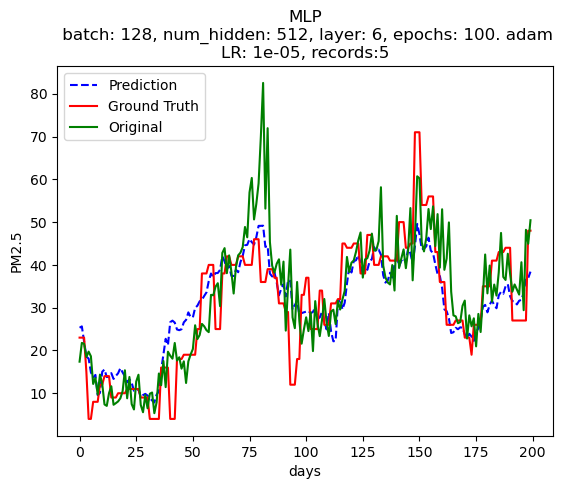

In [19]:
import os
os.listdir(r'.\results\weights')
model_rest = models.AirMLP_6(num_fin=TOTAL_DIMENSION,num_hidden=NUM_HIDDEN).to(device)
model_rest = torch.load(r'.\results\weights\weights_mlp_20230419-6-numhidd.pth')
model_rest.eval()
model = model_rest

import matplotlib.pyplot as plt
import pandas as pd

ari = collection.ari1953
ari = pd.merge(ari,gt,how="inner", on="valid_at").rename(columns={"pm2p5_y":"pm2p5_t","pm2p5_x":"pm2p5"})

x_test = creation(ari,NUM_RECORD)[0][0].flatten(-2)
y_test = creation(ari,NUM_RECORD)[0][1].flatten(-2)[:,0]
model.eval()
print(y_test.isnan().sum())
y_pred = model(x_test[:200,:])
#y_test=y_test.cpu().detach().numpy()[:200]
y_test=y_test[:200]


pred_plot = plt.plot(y_pred.cpu().detach().numpy(), '--b',label="Prediction")
test_plot = plt.plot(y_test.cpu().detach().numpy(),'-r',label="Ground Truth")
test_plot = plt.plot(ari["pm2p5"][:200].reset_index()["pm2p5"],'-g',label="Original")
test_plot = plt.title(f"MLP\n batch: {BATCH_SIZE}, num_hidden: {NUM_HIDDEN}, layer: 6, epochs: {NUM_EPOCHS}. adam\nLR: {LR}, records:{NUM_RECORD}")
test_plot = plt.xlabel('days')
test_plot = plt.ylabel('PM2.5')
leg = plt.legend(loc='upper left')



plt.show()